# Método de Cuadrados Mínimos

Bienvenido/da a la ejercitación del método de Cuadrados Mínimos. En esta oportunidad pondrás en práctica lo aprendido. Utilizarás un enfoque de aproximación iterativo y analítico, como ya es costumbre en este bloque. Poner en práctica la matemática detrás de estos modelos te permitirá tomar mejores decisiones a la hora de implementar y diseñar modelos de machine learning. Puede parecer aburrido pero te dará una buena base de conocimientos.

## Funciones Lineales

La regresión lineal es una de las formas más simples de machine learning. Ya la has visto en la Toolbox 14. Es hora de volver atras, para poder profundizar en su funcionamiento.

En estas funciones hay una variable dependiente y una o más variables independientes. Por ahora avancemos con regresiones lineales de 1 variable. Ya sabemos que estas tiene la forma Y = mX + C, donde: "X" es la variable independiente, "Y" la variable dependiente y "m" y "c" los parámetros que ajusta el modelo.

Cómo aprendiste en la Toolbox, el método de cuadrados mínimos consiste en disminuir el error cuadrático. Este es la suma de los errores de cada punto al cuadrado. Esta ecuación va a ser la función de costo de tu modelo:


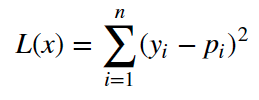

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Empezaremos generando una muestra de datos que posteriormente vamos a ajustar:

In [40]:
# Generamos data a partir de una función lineal
n = 1000
X = np.linspace(-4,10,n)
y = 3*X + 25 + 5*np.random.randn(n)

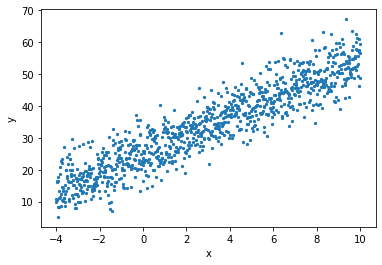

In [41]:
#ploteamos los datos
plt.scatter(X, y, s=5)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Ahora debemos minimizar la función de costo y encontrar los valores de m y c. ¿Recordás cómo minimizamos una función? ¡Derivando e igualando a 0!. Ya lo vimos en la ejercitación pasada con el método de máxima verosimilitud.

Despues de despejar valores, nos quedamos con las siguientes ecuaciones:

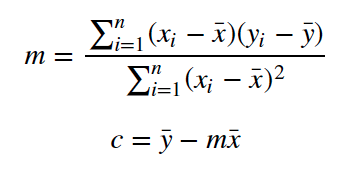

Ahora sólo nos queda iterar cada función con cada punto de nuestra muestra para encontrar los parámetros de la recta. Esta recta nos permitirá hacer las predicciones y conocer la naturaleza de los datos.

In [45]:
#Construimos el modelo
X_mean = np.mean(X)
Y_mean = np.mean(y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m_predict = num / den
c_predict = Y_mean - m_predict*X_mean

print (m_predict, c_predict)

2.9406933180624306 25.24033218328933


Para pensar: ¿son iguales los resultados obtenidos a los parámetros que definimos en la función que generó los datos? ¿por qué?

Grafiquemos la regresión:

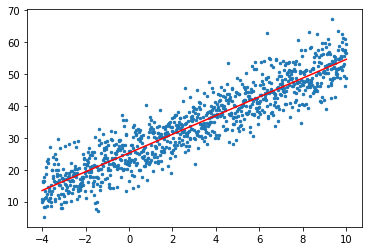

In [46]:
#la función predictora
Y_pred = m_predict*X + c_predict

plt.scatter(X, y, s=6) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') #regresión

plt.show()

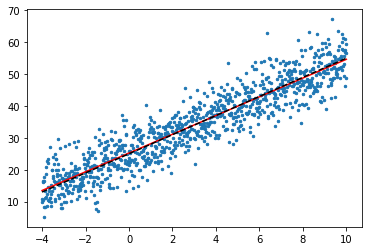

In [49]:
#incluimos la curva teórica
Y_pred = m_predict*X + c_predict
y_teorica = 3*X + 25


plt.scatter(X, y, s=6) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') #regresión
plt.plot(X, y_teorica, '--',label ='Curva Teórica', c = 'k')

plt.show()

¡Casi iguales!

# Cuadrados mínimos no lineales

Hasta ahora vimos cómo hacer regresiones lineales. Ahora vamos a aplicar el método de cuadrados mínimos a una función no lineal. Este método nos permite encontrar los parámetros que mejor ajustan a una función cualquiera, con una serie de datos minimizando la suma del cuadrado del error, o error cuadrático.

 Para entender cómo funciona, vamos a generar datos dados por una parábola con tres parámetros y en vez de usar la rutina de python  que aplica el método, vamos a hacerlo "a mano".



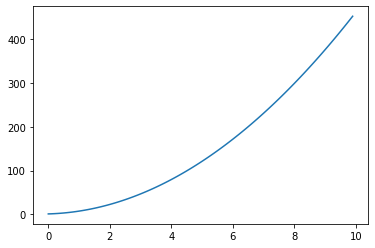

In [70]:
#los parámetros van a ser

a=4.4
b=2
c=1

#generamos la variable x

x=np.arange(0,10,0.1)
n = len(x)

#generamos y cuadrático]

y=(a*x**2 + b*x + c)

#miremos los datos
plt.plot(x,y)

In [135]:
n

100

Ahora la agregamos un ruido del 10% alrededor los datos

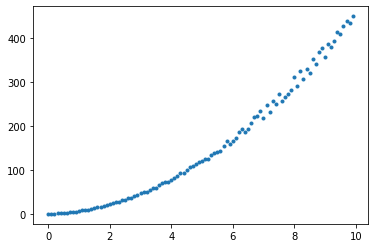

In [71]:
y *= (1 + (np.random.random(n)-0.5)/10)

#veamos cómo quedó
plt.plot(x,y,'.')

Ahora, vamos a aplicar el método de cuadrados mínimos para averiguar el valor del parámetro $a$, suponiendo que $b$ y $c$ son conocidos. Para eso empezamos creando una función que calcula la suma del error cuadrático, que es lo que queremos minimizar en el método de cuadrados mínimos. Escribiendo la variable "modelo" como una cuadrática es donde estamos eligiendo entre una *familia de funciones cuadráticas*. 


In [72]:
def error_cuadratico(datos,a): #depende de los datos y del valor del parámetro A, que es el que queremos ajustar
    modelo=(a*x**2+b*x+c) #x, b, c son "conocidos", son los definidos anteriormente
    error=sum((modelo-datos)**2) #este es el error que queremos minimizar en cuadrados mínimos

    return error 

Ahora aplicamos el método de cuadrados mínimos, lo que vamosa hacer es empezar con un valor semilla de a y variarlo al azar. Si con esa variación el error se achicó, la tomamos, si no la descartamos. Vamos a repetir esto N veces y analizar hacia dónde converge. Haciendo esto, generamos una implementación iterativa del método de cuadrados mínimos. 

In [114]:
# número fijo de iteraciones

N=5000 #cantidad de iteraciones
err_cuad=np.zeros(N)
a_valores=np.zeros(N) #aca vamos a registrar los valores de a
a=1 #valor semilla, recuerden que los datos fueron generados con a=3.4

error=error_cuadratico(y,a) #recuerden que llamamos x a los datos ruidosos

for i in range(N):
    a_prueba= a + (np.random.random(1)-0.5)/100
  
    err_prueba = error_cuadratico(y,a_prueba)
  
    if err_prueba<error:
        a=a_prueba
        error=err_prueba
  
    a_valores[i]=a
    err_cuad[i]=error  

In [130]:
# hasta debajo de XXX error

#N=5000 #cantidad de iteraciones
err_cuad=list()
a_valores=list()#aca vamos a registrar los valores de a
a=1 #valor semilla, recuerden que los datos fueron generados con a=3.4

e = 1000

error=error_cuadratico(y,a) #recuerden que llamamos x a los datos ruidosos

i = 0
while e < error:
    a_prueba= a + (np.random.random(1)-0.5)/100
  
    err_prueba = error_cuadratico(y,a_prueba)
  
    if err_prueba<error:
        a=a_prueba
        error=err_prueba
  
    a_valores.append(a)
    err_cuad.append(error )
    i += 1
    
    if (i % 1000 == 0):
        print(f"voy por la iteración {i}")
    
    if (i > 1e6):
        break

a_valores = np.array(a_valores)
err_cuad = np.array(err_cuad)

voy por la iteración 1000
voy por la iteración 2000
voy por la iteración 3000
voy por la iteración 4000
voy por la iteración 5000
voy por la iteración 6000
voy por la iteración 7000
voy por la iteración 8000
voy por la iteración 9000
voy por la iteración 10000
voy por la iteración 11000
voy por la iteración 12000
voy por la iteración 13000
voy por la iteración 14000
voy por la iteración 15000
voy por la iteración 16000
voy por la iteración 17000
voy por la iteración 18000
voy por la iteración 19000
voy por la iteración 20000
voy por la iteración 21000
voy por la iteración 22000
voy por la iteración 23000
voy por la iteración 24000
voy por la iteración 25000
voy por la iteración 26000
voy por la iteración 27000
voy por la iteración 28000
voy por la iteración 29000
voy por la iteración 30000
voy por la iteración 31000
voy por la iteración 32000
voy por la iteración 33000
voy por la iteración 34000
voy por la iteración 35000
voy por la iteración 36000
voy por la iteración 37000
voy por la

voy por la iteración 302000
voy por la iteración 303000
voy por la iteración 304000
voy por la iteración 305000
voy por la iteración 306000
voy por la iteración 307000
voy por la iteración 308000
voy por la iteración 309000
voy por la iteración 310000
voy por la iteración 311000
voy por la iteración 312000
voy por la iteración 313000
voy por la iteración 314000
voy por la iteración 315000
voy por la iteración 316000
voy por la iteración 317000
voy por la iteración 318000
voy por la iteración 319000
voy por la iteración 320000
voy por la iteración 321000
voy por la iteración 322000
voy por la iteración 323000
voy por la iteración 324000
voy por la iteración 325000
voy por la iteración 326000
voy por la iteración 327000
voy por la iteración 328000
voy por la iteración 329000
voy por la iteración 330000
voy por la iteración 331000
voy por la iteración 332000
voy por la iteración 333000
voy por la iteración 334000
voy por la iteración 335000
voy por la iteración 336000
voy por la iteración

voy por la iteración 596000
voy por la iteración 597000
voy por la iteración 598000
voy por la iteración 599000
voy por la iteración 600000
voy por la iteración 601000
voy por la iteración 602000
voy por la iteración 603000
voy por la iteración 604000
voy por la iteración 605000
voy por la iteración 606000
voy por la iteración 607000
voy por la iteración 608000
voy por la iteración 609000
voy por la iteración 610000
voy por la iteración 611000
voy por la iteración 612000
voy por la iteración 613000
voy por la iteración 614000
voy por la iteración 615000
voy por la iteración 616000
voy por la iteración 617000
voy por la iteración 618000
voy por la iteración 619000
voy por la iteración 620000
voy por la iteración 621000
voy por la iteración 622000
voy por la iteración 623000
voy por la iteración 624000
voy por la iteración 625000
voy por la iteración 626000
voy por la iteración 627000
voy por la iteración 628000
voy por la iteración 629000
voy por la iteración 630000
voy por la iteración

voy por la iteración 896000
voy por la iteración 897000
voy por la iteración 898000
voy por la iteración 899000
voy por la iteración 900000
voy por la iteración 901000
voy por la iteración 902000
voy por la iteración 903000
voy por la iteración 904000
voy por la iteración 905000
voy por la iteración 906000
voy por la iteración 907000
voy por la iteración 908000
voy por la iteración 909000
voy por la iteración 910000
voy por la iteración 911000
voy por la iteración 912000
voy por la iteración 913000
voy por la iteración 914000
voy por la iteración 915000
voy por la iteración 916000
voy por la iteración 917000
voy por la iteración 918000
voy por la iteración 919000
voy por la iteración 920000
voy por la iteración 921000
voy por la iteración 922000
voy por la iteración 923000
voy por la iteración 924000
voy por la iteración 925000
voy por la iteración 926000
voy por la iteración 927000
voy por la iteración 928000
voy por la iteración 929000
voy por la iteración 930000
voy por la iteración

In [131]:
i

1000001

In [132]:
error

3544.110671515597

In [133]:
a

array([4.3740596])

In [115]:
(np.random.random(1)-0.5)/100

array([-0.00273049])

In [134]:
error_cuadratico(y,4.4)

3675.349373273218

In [122]:
error

3544.110675200493

In [123]:
error_cuadratico(y,1)

2223857.8387587275

In [117]:
error

3544.110675200493

In [118]:
err_cuad

array([2219135.23608048, 2219135.23608048, 2219135.23608048, ...,
          3544.1106752 ,    3544.1106752 ,    3544.1106752 ])

Veamos a dónde convergió

In [111]:
print(a)

[4.37425745]


Veamos cómo evolucionó el valor de $a$ a lo largo de las iteraciones

Text(0, 0.5, 'valor de a')

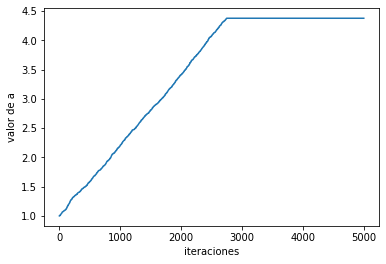

In [119]:
plt.plot(a_valores)
plt.xlabel('iteraciones')
plt.ylabel('valor de a')

Veamos cómo evolucionó el error cuadrático

Text(0, 0.5, 'error cuadratico')

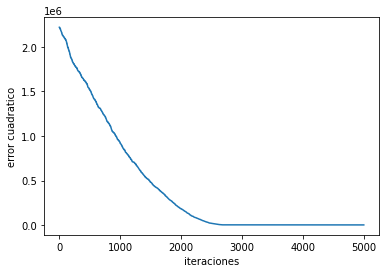

In [120]:
plt.plot(err_cuad)
plt.xlabel('iteraciones')
plt.ylabel('error cuadratico')

¿Qué te parece la curva del error en función del número de iteraciones? En este caso, su comportamiento es similar al que tenían las funciones de costo de machine learning. ¿tiene sentido que eso sea así? ¿por qué?

Ahora veamos cómo quedó el ajuste

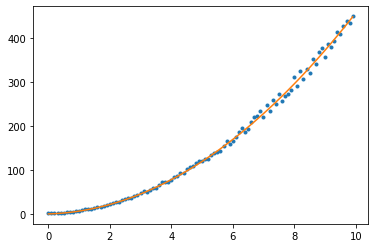

In [121]:
y_ajuste=a*x**2+b*x*c #acá a es el ajustado
plt.plot(x,y,'.')
plt.plot(x,y_ajuste)


Así es como podría implementarse el método de cuadrados sin usar la librería de python. Ahora prueba hacer esto:

1)Una variante del mismo código en la que en vez de hacer una cantidad fija N de iteraciones, puedes pedir que el error sea más pequeño que 0.0001. ¿Cuántas iteraciones hace el código?

2) Intenta generalizar el código para hallar $a$ y $b$, es decir, dos parámetros en vez de uno.

3) ¿puedes hacerlo para hallar todos los parámetros a la vez?

4)Ahora ajusta los datos de la función lineal del principio del colab con cuadrados mínimos en vez de con una regresión.


In [16]:
# 1 
error_deseado=0.001


a=3.9
a_prueba=a  
error=error_cuadratico(y,a_prueba)
N=0  
while err_prueba>error_deseado:
    N=N+1 #cantidad de iteraciones
    a_prueba=a+(np.random.random(1)-0.5)/100
    err_prueba=error_cuadratico(y,a_prueba)

    if err_prueba<error:
        a=a_prueba
        error=err_prueba

KeyboardInterrupt: 